In [133]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.simplefilter('ignore')
from sklearn.impute import KNNImputer
from docx import Document
from sklearn.impute import SimpleImputer

In [116]:
masterList= {"Fruits and Nuts":['Apples', 'Apricots', 'Cherries', 'Currants', 'Gooseberries', 'Grapes', 'Peaches and nectarines', 'Pears', 'Plums and sloes', 'Raspberries', 'Sour cherries', 'Strawberries', 
                                       'Walnuts, in shell', 'Blueberries', 'Other stone fruits', 'Other berries and fruits of the genus vaccinium n.e.c.'],
            "Vegetables and Legumes":['Asparagus', 'Broad beans and horse beans, dry', 'Broad beans and horse beans, green', 'Beans, dry', 'Cabbages', 'Carrots and turnips', 'Cauliflowers and broccoli', 
                                                    'Cucumbers and gherkins', 'Lentils, dry', 'Lettuce and chicory', 'Lupins', 'Other beans, green', 'Other pulses n.e.c.', 'Other vegetables, fresh n.e.c.', 'Peas, dry', 
                                                    'Peas, green', 'Potatoes', 'Spinach', 'Sugar beet', 'Tomatoes', 'Leeks and other alliaceous vegetables', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 
                                                    'Pumpkins, squash and gourds', 'Onions and shallots, green', 'Onions and shallots, dry (excluding dehydrated)'],
             "Cereals":['Barley', 'Maize (corn)', 'Mixed grain', 'Oats', 'Rye', 'Triticale', 'Wheat'],
             "Industrial_crops" :['Mustard seed', 'Other oil seeds, n.e.c.', 'Poppy seed', 'Rape or colza seed', 'Sunflower seed', 'Soya beans', 'Linseed','Hop cones','Vetches', 'Unmanufactured tobacco']}

In [117]:
fao_data = pd.read_csv("master_data_processed.csv")
del fao_data['Unnamed: 0']
fao_data.columns

Index(['Year', 'Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes', 'Item', 'Yield(tonnes/ha)',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other', 'Fung & Bact – Triazoles, diazoles',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Other',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Urea derivates',
       'Insecticides – Botanical products and biologicals',
       'Insecticides – Carbamates', 'Insecticides – Organo-phosphates',
       'Insecticides – Other', 'Insecticides – Pyrethroids', 'Mineral Oils',
       'Plant Growth Regulators', 'Rodenticides – Other',
       'Herbicides – Bipiridils', 'Herbicides – Sulfonyl ureas',
       'Rodenticides – Anti-coagulants'],
 

In [118]:
# Define a lambda function to apply the condition
category_func = lambda x: next((k for k, v in masterList.items() if x in v), None)

# Apply the lambda function to create new column
fao_data['Category'] = fao_data['Item'].apply(category_func)

In [119]:
df = fao_data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#df.reset_index(drop=True, inplace=True)
df.set_index("Year", inplace=True)
df.index.name = None
df

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Insecticides – Organo-phosphates,Insecticides – Other,Insecticides – Pyrethroids,Mineral Oils,Plant Growth Regulators,Rodenticides – Other,Herbicides – Bipiridils,Herbicides – Sulfonyl ureas,Rodenticides – Anti-coagulants,Category
1990-01-01,1787300,609000,954400,Apples,26.3272,215.0,1047.0,2828.0,2466.0,2670.0,...,891.0,396.0,113.0,642.0,1910.0,8.0,139.766667,41.6,5.0,Fruits and Nuts
1990-01-01,1787300,609000,954400,Apricots,2.5781,215.0,1047.0,2828.0,2466.0,2670.0,...,891.0,396.0,113.0,642.0,1910.0,8.0,139.766667,41.6,5.0,Fruits and Nuts
1990-01-01,1787300,609000,954400,Asparagus,2.7611,215.0,1047.0,2828.0,2466.0,2670.0,...,891.0,396.0,113.0,642.0,1910.0,8.0,139.766667,41.6,5.0,Vegetables and Legumes
1990-01-01,1787300,609000,954400,Barley,5.3558,215.0,1047.0,2828.0,2466.0,2670.0,...,891.0,396.0,113.0,642.0,1910.0,8.0,139.766667,41.6,5.0,Cereals
1990-01-01,1787300,609000,954400,"Beans, dry",3.0736,215.0,1047.0,2828.0,2466.0,2670.0,...,891.0,396.0,113.0,642.0,1910.0,8.0,139.766667,41.6,5.0,Vegetables and Legumes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,1265477,192182,446396,Sugar beet,74.1402,32.0,52.0,1655.0,2851.0,3180.0,...,0.0,20739.0,121.0,359.0,2233.0,16.0,0.000000,134.0,0.1,Vegetables and Legumes
2020-01-01,1265477,192182,446396,Sunflower seed,2.0567,32.0,52.0,1655.0,2851.0,3180.0,...,0.0,20739.0,121.0,359.0,2233.0,16.0,0.000000,134.0,0.1,Industrial_crops
2020-01-01,1265477,192182,446396,Tomatoes,268.7368,32.0,52.0,1655.0,2851.0,3180.0,...,0.0,20739.0,121.0,359.0,2233.0,16.0,0.000000,134.0,0.1,Vegetables and Legumes
2020-01-01,1265477,192182,446396,Triticale,5.9663,32.0,52.0,1655.0,2851.0,3180.0,...,0.0,20739.0,121.0,359.0,2233.0,16.0,0.000000,134.0,0.1,Cereals


In [120]:
fao_data['Category'].value_counts()

Vegetables and Legumes    670
Fruits and Nuts           450
Industrial_crops          237
Cereals                   217
Name: Category, dtype: int64

In [23]:
doc = Document()
B = pd.DataFrame(columns=['column_name', 'datatype', 'unique_value_count'])

for col in fao_data.columns:
    col_type = str(fao_data[col].dtype)
    unique_count = fao_data[col].nunique()
    B = B.append({'column_name': col, 'datatype': col_type, 'unique_value_count': unique_count}, ignore_index=True)

B
# create a Word document and add a table to it
doc = Document()
table = doc.add_table(rows=1, cols=4)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Column Name'
hdr_cells[1].text = 'Data Type'
hdr_cells[2].text = 'Unique Values'
hdr_cells[3].text = 'Description'

# add the rows from the dataframe to the table
for i, row in B.iterrows():
    cells = table.add_row().cells
    cells[0].text = row['column_name']
    cells[1].text = row['datatype']
    cells[2].text = str(row['unique_value_count'])

# save the Word document
doc.save('prepresult.docx')


In [121]:
num_cols = ['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes', 'Yield(tonnes/ha)',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other', 'Fung & Bact – Triazoles, diazoles',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Other',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Urea derivates',
       'Insecticides – Botanical products and biologicals',
       'Insecticides – Carbamates', 'Insecticides – Organo-phosphates',
       'Insecticides – Other', 'Insecticides – Pyrethroids', 'Mineral Oils',
       'Plant Growth Regulators', 'Rodenticides – Other',
       'Herbicides – Bipiridils', 'Herbicides – Sulfonyl ureas',
       'Rodenticides – Anti-coagulants']

In [122]:
cat_names = df['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

In [123]:
stat = []
non_stat = []

for cate in cat_names:
    crop_df = df[df["Category"] == cate ]
    for col in num_cols:
        # perform ADF test to check stationarity
        adf_result = adfuller(crop_df[col])
        #print('ADF Statistic: %f' % adf_result[0])
        #print('p-value: %f' % adf_result[1])
        #print('Critical Values:')
        if adf_result[1] > 0.05:
            #print ('Time series is NOT stationary')
            non_stat.append(cate + "<--->" + col)
        else:
            #print ('Time series is stationary')
            stat.append(cate + "<--->" + col)

print("Stationary:", stat)
print("Not Stationary:", non_stat)

Stationary: ['Fruits and Nuts<--->Yield(tonnes/ha)', 'Fruits and Nuts<--->Herbicides – Dinitroanilines', 'Fruits and Nuts<--->Insecticides – Botanical products and biologicals', 'Fruits and Nuts<--->Insecticides – Carbamates', 'Fruits and Nuts<--->Insecticides – Organo-phosphates', 'Fruits and Nuts<--->Plant Growth Regulators', 'Fruits and Nuts<--->Rodenticides – Anti-coagulants', 'Vegetables and Legumes<--->Nutrient potash K2O (total) - tonnes', 'Vegetables and Legumes<--->Yield(tonnes/ha)', 'Vegetables and Legumes<--->Fung & Bact – Inorganics', 'Vegetables and Legumes<--->Herbicides – Dinitroanilines', 'Vegetables and Legumes<--->Herbicides – Other', 'Vegetables and Legumes<--->Insecticides – Botanical products and biologicals', 'Vegetables and Legumes<--->Insecticides – Carbamates', 'Vegetables and Legumes<--->Plant Growth Regulators', 'Vegetables and Legumes<--->Herbicides – Sulfonyl ureas', 'Vegetables and Legumes<--->Rodenticides – Anti-coagulants', 'Cereals<--->Herbicides – Dini

In [135]:
#main_df = pd.DataFrame(columns= df.columns)
#knni_df = pd.DataFrame(imputer.fit_transform(new_df[cols_imp]))
#imputer = KNNImputer(n_neighbors=5)
imputer = SimpleImputer(strategy='mean')
main_df = pd.DataFrame()

for cate in cat_names: 
    crop_df = df[df["Category"] == cate]
    for col in num_cols:
        if crop_df[col].count() < 5:
            continue
        #first_diff = crop_df['Yield(tonnes/ha)']
        adf_result = adfuller(crop_df[col])
        while adf_result[1] > 0.05:
            #print ('Time series is NOT stationary')
            #first_diff = first_diff.diff().dropna()
            crop_df[col] = crop_df[col].diff()
            crop_df[col] = crop_df[col].fillna(crop_df[col].mean())
            adf_result = adfuller(crop_df[col])

        # Shift the minimum value to zero
        min_val = crop_df[col].min()
        crop_df[col] = (crop_df[col] - min_val) + 1e-6
        #crop_df = crop_df.dropna(subset=["Yield(tonnes/ha)"])
        for i in range(1, 4):
            crop_df[f'{col}-{i}'] = crop_df[col].shift(i).fillna(crop_df[col].shift(i).mean())
            
        #crop_df = crop_df.dropna() 
    main_df = pd.concat([main_df, crop_df])

main_df
    

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,255388.810691,141418.674834,331000.587974,Apples,25.331101,274.402429,605.783965,649.217529,1829.067462,916.135858,...,81.037938,109.688023,109.687327,109.686628,259.436250,259.436710,259.437173,0.668353,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Apricots,1.582001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,109.688717,109.687327,109.686628,259.435792,259.436710,259.437173,5.000001,0.669622,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Cherries,4.086701,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037938,110.000001,109.688717,109.686628,259.230001,259.435792,259.437173,5.000001,5.000001,0.670896
1990-01-01,256551.000001,142347.000001,332132.000001,Currants,6.042201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.037818,110.000001,110.000001,109.688717,259.230001,259.230001,259.435792,5.000001,5.000001,5.000001
1990-01-01,256551.000001,142347.000001,332132.000001,Gooseberries,5.812001,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,5.000001,5.000001,5.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,256551.000001,142347.000001,332132.000001,Sunflower seed,2.421201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,86.020001,110.000001,110.000001,29.000001,259.230001,259.230001,290.230001,0.410001,0.410001,0.410001
2020-01-01,149944.000001,86763.000001,358986.000001,Hop cones,3.519101,259.810001,367.000001,793.830001,1968.210001,142.000001,...,81.020001,110.000001,110.000001,110.000001,259.230001,259.230001,259.230001,0.410001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Rape or colza seed,4.693201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,26.000001,110.000001,110.000001,263.230001,259.230001,259.230001,0.100001,0.410001,0.410001
2020-01-01,256551.000001,142347.000001,332132.000001,Soya beans,2.281201,274.810001,608.000001,651.830001,1828.210001,915.000001,...,81.020001,110.000001,26.000001,110.000001,259.230001,263.230001,259.230001,0.100001,0.100001,0.410001


In [136]:
main_df['Category'].value_counts()

Vegetables and Legumes    670
Fruits and Nuts           450
Industrial_crops          237
Cereals                   217
Name: Category, dtype: int64

In [139]:
main_df.columns

Index(['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes', 'Item', 'Yield(tonnes/ha)',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other',
       ...
       'Rodenticides – Other-3', 'Herbicides – Bipiridils-1',
       'Herbicides – Bipiridils-2', 'Herbicides – Bipiridils-3',
       'Herbicides – Sulfonyl ureas-1', 'Herbicides – Sulfonyl ureas-2',
       'Herbicides – Sulfonyl ureas-3', 'Rodenticides – Anti-coagulants-1',
       'Rodenticides – Anti-coagulants-2', 'Rodenticides – Anti-coagulants-3'],
      dtype='object', length=114)

In [138]:
main_df.to_csv('latest_2504.csv', index=True)

In [99]:
# #main_df = pd.DataFrame(columns= df.columns)
# main_df = pd.DataFrame()

# for cate in cat_names: 
#     crop_df = df[df["Category"] == cate]
#     #first_diff = crop_df['Yield(tonnes/ha)']
#     adf_result = adfuller(crop_df['Yield(tonnes/ha)'])
#     while adf_result[1] > 0.05:
#         print ('Time series is NOT stationary')
#         #first_diff = first_diff.diff().dropna()
#         crop_df['Yield(tonnes/ha)'] = crop_df['Yield(tonnes/ha)'].diff()
#         crop_df = crop_df.dropna()
#         adf_result = adfuller(crop_df['Yield(tonnes/ha)'])

#     # Shift the minimum value to zero
#     min_val = crop_df['Yield(tonnes/ha)'].min()
#     crop_df['Yield(tonnes/ha)'] = (crop_df['Yield(tonnes/ha)'] - min_val) + 1e-6
#     #crop_df = crop_df.dropna(subset=["Yield(tonnes/ha)"])
#     for i in range(1, 4):
#         crop_df[f'yield_t-{i}'] = crop_df['Yield(tonnes/ha)'].shift(i)
#     crop_df = crop_df.dropna() 
#     main_df = pd.concat([main_df, crop_df])

# main_df
    



In [181]:
main_df.to_csv('latest_2504.csv', index=True)

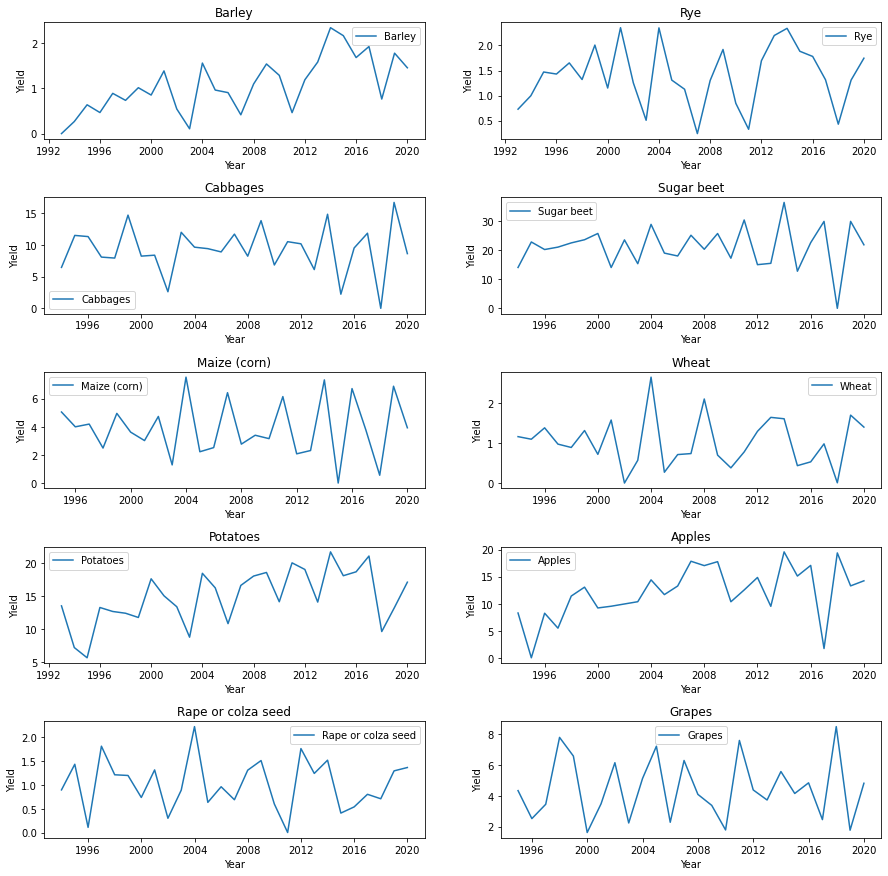

In [176]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15) )
count = 0
for crop in crop_names:
    crop_df = main_df[main_df["Item"] == crop]
    year_list = crop_df.index
    yield_data = crop_df["Yield(tonnes/ha)"]
    
    # Determine the row and column indices of the subplot
    row_idx = count % 5
    col_idx = count // 5
    
    # Select the appropriate subplot
    ax = axs[row_idx, col_idx]
    
    # Plot the yield data for the current item on the subplot
    ax.plot(year_list, yield_data, label=crop)
    
    # Set the title and axis labels for the subplot
    ax.set_title(crop)
    ax.set_xlabel('Year')
    ax.set_ylabel('Yield')
    
    # Add a legend to the subplot
    ax.legend()
    
    # change axis
    count +=1

plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Show the figure
plt.show()

In [115]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# pd.options.mode.chained_assignment = None  # default='warn'
# # Loop over each independent variable and plot against the dependent variable
# for crop in crop_names:
#     crop_df = df[df["Item"] == crop]
    
#     # convert the 'year' column to datetime
#     crop_df['Year'] = pd.to_datetime(crop_df['Year'], format='%Y')
#     crop_df.set_index("Year", inplace=True)

#     decomp_add = seasonal_decompose(crop_df["Yield(tonnes/ha)"], model="additive", period=1)
    
#     plt.rcParams.update({'figure.figsize': (8,6)})
#     decomp_add.plot().suptitle(f'Additive Decomposition {crop}', fontsize=16)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

#     decomp_mult = seasonal_decompose(crop_df["Yield(tonnes/ha)"], model="additive", period=1)
  
#     plt.rcParams.update({'figure.figsize': (8,6)})
#     decomp_mult.plot().suptitle(f'Multiplicative Decomposition {crop}', fontsize=16)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

    

In [102]:
# for crop in non_stat:
#     crop_df = df[df["Item"] == crop]

#     y = crop_df['Yield(tonnes/ha)']   
#     first_diff = y.copy().diff()
#     first_diff = first_diff.dropna()
#     adf_result = adfuller(pd.DataFrame(first_diff))
#     while adf_result[1] > 0.05:
#         print ('Time series is NOT stationary')
#         first_diff = first_diff.copy().diff()
#         first_diff = first_diff.dropna()
#         adf_result = adfuller(pd.DataFrame(first_diff))
    
#     plot_pacf(first_diff, lags=10)
    
    
    


In [ ]:

for crop in non_stat: 
    crop_df = df[df["Item"] == crop]
    first_diff = crop_df["Yield (tonnes/ha)"].copy().diff()
    first_diff = first_diff.dropna()

    plot_pacf(first_diff)

In [76]:
#create a sliding window with a window size of 3

lagged_df = pd.DataFrame()
for crop in crop_names:
    crop_df = df[df["Item"] == crop]
    for i in range(1, 4):
        crop_df[f'yield_t-{i}'] = crop_df['Yield(tonnes/ha)'].shift(i)
    crop_df = crop_df.dropna()
    lagged_df = pd.concat([lagged_df, crop_df], axis=0)
  
    


In [79]:
lagged_df['Item'].value_counts()

Barley                28
Cabbages              28
Maize (corn)          28
Potatoes              28
Rape or colza seed    28
Rye                   28
Sugar beet            28
Wheat                 28
Grapes                27
Apples                26
Name: Item, dtype: int64

In [26]:
df.to_csv("master_data_TS.csv")
    

In [25]:
df.columns

Index(['Nutrient nitrogen N (total) - tonnes',
       'Nutrient phosphate P2O5 (total) - tonnes',
       'Nutrient potash K2O (total) - tonnes', 'Item', 'Yield(tonnes/ha)',
       'Fung & Bact – Benzimidazoles', 'Fung & Bact – Diazines, morpholines',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Inorganics',
       'Fung & Bact – Other', 'Fung & Bact – Triazoles, diazoles',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Other',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Urea derivates',
       'Insecticides – Botanical products and biologicals',
       'Insecticides – Carbamates', 'Insecticides – Organo-phosphates',
       'Insecticides – Other', 'Insecticides – Pyrethroids', 'Mineral Oils',
       'Plant Growth Regulators', 'Rodenticides – Other',
       'Herbicides – Bipiridils', 'Herbicides – Sulfonyl ureas',
       'Rodenticides – Anti-coagulants', 'yield_t-1